In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [3]:
boston = pd.read_csv('HousingData.csv')
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
#boston.isna()   # true or false for all column
#boston['ZN'].isnull().values.any()   # true or false for one column
#boston['PTRATIO'].isnull().sum()  # بتعد في كام قيمه مفقوده 
#boston.isnull().values.any()
#boston.isnull().tail()
#boston.notnull().tail()
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
fill_nan = boston['CRIM'].fillna(value=0,inplace = True)
fill_nan = boston['ZN'].fillna(value=0 ,inplace = True)
fill_nan = boston['INDUS'].fillna(value= 0,inplace = True)
fill_nan = boston['CHAS'].fillna(value= 0,inplace = True)
fill_nan = boston['AGE'].fillna(value= 0,inplace = True)
fill_nan = boston['LSTAT'].fillna(value= 0 ,inplace = True)

In [6]:
x = boston.drop('MEDV',axis=1).values
y= boston['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
names= boston.columns.drop('MEDV')
print(names)
print(len(names))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
13


In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)


Lasso(alpha=0.1)

In [12]:
coeff = lasso.coef_
coeff

array([-0.10827023,  0.0484652 , -0.05798282,  1.41597717, -0.        ,
        4.26006424, -0.02141141, -1.10335645,  0.24850677, -0.01418573,
       -0.79946215,  0.01034894, -0.43173415])

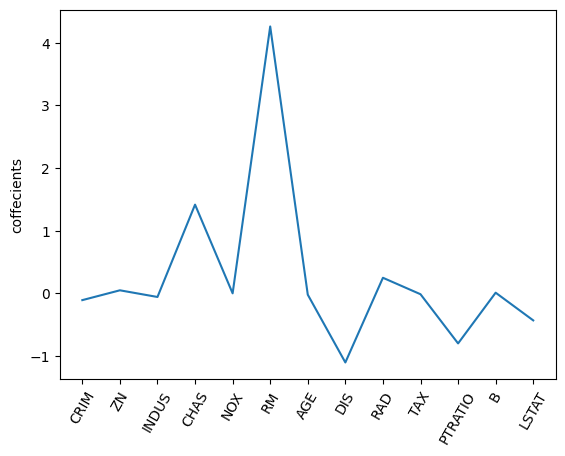

In [13]:
plt.plot(range(len(names)),coeff)
plt.xticks(range(len(names)),names,rotation = 60)  # حجزت 13 مكان ل 13 اسم دوران الكلمه 60
plt.ylabel('coffecients')
plt.show()

In [ ]:
# import seaborn as sns
# sns.pairplot(boston)

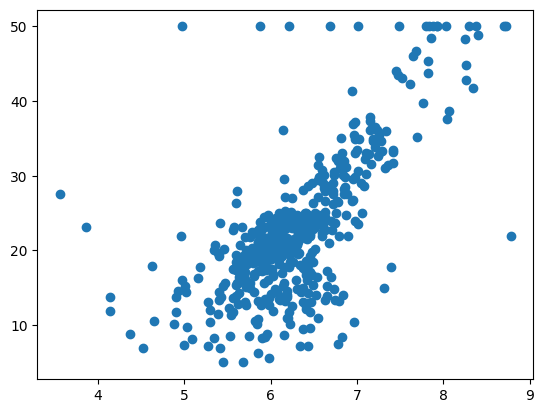

In [14]:
plt.scatter(boston["RM"],boston["MEDV"])